This notebook imports data that were scraped from BoxOfficeMojo in previous notebooks. The data include:

 - Movie Title, Studio, Opening, Budget, Earliest Release Date, MPAA Rating, Runtime, Genres, Domestic Gross, International Gross

Workflow:
Package into a pandas DataFrame, 





In [1]:
import requests
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in the data, create a DataFrame

In [2]:
# Read in the list of dictionaries with movie data
with open('movies_data_raw.pickle','rb') as read_file:
    movies_raw = pickle.load(read_file)

In [3]:
# convert to a data frame
movies_df = pd.DataFrame(movies_raw)
movies_df

,Title,Studio,Opening,Budget,Release,Rating,Runtime,Genre,Domestic,International
0,Toy Story 4,Walt Disney Studios Motion Pictures,"$120,908,065","$200,000,000","June 20, 2019",G,1 hr 40 min,"[Adventure, Animation, Comedy, Family, Fantasy]","$434,038,008","$639,356,585"
1,The Lion King,Walt Disney Studios Motion Pictures,"$1,586,753","$45,000,000","June 15, 1994",G,1 hr 28 min,"[Adventure, Animation, Drama, Family, Musical]","$422,783,777","$545,728,028"
2,Toy Story 3,Walt Disney Studios Motion Pictures,"$110,307,189","$200,000,000","June 16, 2010",na,1 hr 43 min,"[Adventure, Animation, Comedy, Family, Fantasy]","$415,004,880","$651,964,823"
3,Finding Nemo,Walt Disney Studios Motion Pictures,"$70,251,710","$94,000,000","May 30, 2003",na,1 hr 40 min,"[Adventure, Animation, Comedy, Family]","$380,843,261","$559,506,933"
4,"Monsters, Inc.",Walt Disney Studios Motion Pictures,"$62,577,067","$115,000,000","November 2, 2001",G,1 hr 32 min,"[Adventure, Animation, Comedy, Family, Fantasy]","$289,916,256","$289,064,814"
...,...,...,...,...,...,...,...,...,...,...
3358,Three Days of the Condor,Paramount Pictures,na,na,"September 24, 1975",na,1 hr 57 min,"[Mystery, Thriller]","$27,476,252","$27,476,252"
3359,Friday,New Line Cinema,"$6,589,341","$3,500,000","April 28, 1995",R,1 hr 31 min,"[Comedy, Drama]","$27,467,564","$748,354"
3360,The Brothers,Screen Gems,"$10,302,846","$6,000,000","March 23, 2001",R,1 hr 46 min,"[Comedy, Drama]","$27,457,409","$500,782"
3361,Midsommar,A24,"$6,560,030","$9,000,000","July 3, 2019",R,2 hr 28 min,"[Drama, Horror, Mystery, Thriller]","$27,426,361","$20,476,738"


In [4]:
# Change 'na' to np.nan
movies_df.replace('na',np.nan, inplace=True)

In [5]:
# Get a report of 'na' fields by feature
movies_df.apply(lambda x: sum(x.isna()), axis=0)

Title               0
Studio              7
Opening           251
Budget           1386
Release             2
Rating            859
Runtime             0
Genre               0
Domestic            0
International       0
dtype: int64

### Impute ratings

In [6]:
# Movies are sorted by MPAA rating
# That let's us impute missing values in the rating column
for index, row in movies_df.iterrows():
    if row['Rating'] in ['G','PG','PG-13','R']:
        current_rating = row['Rating']
    else:
        row['Rating'] = current_rating

In [7]:
movies_df

,Title,Studio,Opening,Budget,Release,Rating,Runtime,Genre,Domestic,International
0,Toy Story 4,Walt Disney Studios Motion Pictures,"$120,908,065","$200,000,000","June 20, 2019",G,1 hr 40 min,"[Adventure, Animation, Comedy, Family, Fantasy]","$434,038,008","$639,356,585"
1,The Lion King,Walt Disney Studios Motion Pictures,"$1,586,753","$45,000,000","June 15, 1994",G,1 hr 28 min,"[Adventure, Animation, Drama, Family, Musical]","$422,783,777","$545,728,028"
2,Toy Story 3,Walt Disney Studios Motion Pictures,"$110,307,189","$200,000,000","June 16, 2010",G,1 hr 43 min,"[Adventure, Animation, Comedy, Family, Fantasy]","$415,004,880","$651,964,823"
3,Finding Nemo,Walt Disney Studios Motion Pictures,"$70,251,710","$94,000,000","May 30, 2003",G,1 hr 40 min,"[Adventure, Animation, Comedy, Family]","$380,843,261","$559,506,933"
4,"Monsters, Inc.",Walt Disney Studios Motion Pictures,"$62,577,067","$115,000,000","November 2, 2001",G,1 hr 32 min,"[Adventure, Animation, Comedy, Family, Fantasy]","$289,916,256","$289,064,814"
...,...,...,...,...,...,...,...,...,...,...
3358,Three Days of the Condor,Paramount Pictures,NaN,NaN,"September 24, 1975",R,1 hr 57 min,"[Mystery, Thriller]","$27,476,252","$27,476,252"
3359,Friday,New Line Cinema,"$6,589,341","$3,500,000","April 28, 1995",R,1 hr 31 min,"[Comedy, Drama]","$27,467,564","$748,354"
3360,The Brothers,Screen Gems,"$10,302,846","$6,000,000","March 23, 2001",R,1 hr 46 min,"[Comedy, Drama]","$27,457,409","$500,782"
3361,Midsommar,A24,"$6,560,030","$9,000,000","July 3, 2019",R,2 hr 28 min,"[Drama, Horror, Mystery, Thriller]","$27,426,361","$20,476,738"


### Drop rows with NA Budget and Opening

In [8]:
# Budget and Opening account for most NAs. Dropping these gets rid of rows with NA in other features as well.
movies_df.dropna(subset=['Budget','Opening'],axis=0,inplace=True)

In [9]:
# Check if any NAs remaining
movies_df.apply(lambda x: sum(x.isna()), axis=0)

Title            0
Studio           0
Opening          0
Budget           0
Release          0
Rating           0
Runtime          0
Genre            0
Domestic         0
International    0
dtype: int64

In [10]:
movies_df.shape

(1935, 10)

### Convert Release Date to DateTime object

In [13]:
# Convert Release Date, drop the original
movies_df['DateYear'] = pd.to_datetime(movies_df['Release']).dt.year
movies_df['DateMonth'] = pd.to_datetime(movies_df['Release']).dt.month
movies_df.drop(columns=['Release'], inplace=True, axis=1)

### Convert Runtime string to minutes integer

In [14]:
# Some runtimes list hours and minutes, some only list hours
# Use runtime_to_minutes to convert runtime string to an integer of total minutes

def runtime_to_minutes(row):
    """
    Split runtime string into hours and minutes (or just hours),
    convert values to integers, and return runtime as an integer of total minutes
    """
    time_list = row['Runtime'].split(' ')
    if len(time_list) == 2:
        tot_mins = int(time_list[0])*60
    else:
        tot_mins = int(time_list[0])*60 + int(time_list[2])
    return tot_mins

movies_df['Runtime'] = movies_df.apply(runtime_to_minutes, axis = 1)
movies_df

,Title,Studio,Opening,Budget,Rating,Runtime,Genre,Domestic,International,DateYear,DateMonth
0,Toy Story 4,Walt Disney Studios Motion Pictures,"$120,908,065","$200,000,000",G,100,"[Adventure, Animation, Comedy, Family, Fantasy]","$434,038,008","$639,356,585",2019,6
1,The Lion King,Walt Disney Studios Motion Pictures,"$1,586,753","$45,000,000",G,88,"[Adventure, Animation, Drama, Family, Musical]","$422,783,777","$545,728,028",1994,6
2,Toy Story 3,Walt Disney Studios Motion Pictures,"$110,307,189","$200,000,000",G,103,"[Adventure, Animation, Comedy, Family, Fantasy]","$415,004,880","$651,964,823",2010,6
3,Finding Nemo,Walt Disney Studios Motion Pictures,"$70,251,710","$94,000,000",G,100,"[Adventure, Animation, Comedy, Family]","$380,843,261","$559,506,933",2003,5
4,"Monsters, Inc.",Walt Disney Studios Motion Pictures,"$62,577,067","$115,000,000",G,92,"[Adventure, Animation, Comedy, Family, Fantasy]","$289,916,256","$289,064,814",2001,11
...,...,...,...,...,...,...,...,...,...,...,...
3353,Saw VI,Lionsgate,"$14,118,444","$11,000,000",R,90,"[Horror, Mystery]","$27,693,292","$40,540,862",2009,10
3359,Friday,New Line Cinema,"$6,589,341","$3,500,000",R,91,"[Comedy, Drama]","$27,467,564","$748,354",1995,4
3360,The Brothers,Screen Gems,"$10,302,846","$6,000,000",R,106,"[Comedy, Drama]","$27,457,409","$500,782",2001,3
3361,Midsommar,A24,"$6,560,030","$9,000,000",R,148,"[Drama, Horror, Mystery, Thriller]","$27,426,361","$20,476,738",2019,7


### Convert currency to integer values

In [15]:
# Convert currency strings to integers so they can be used as a continuous features
# Also set international earnings to 0 if scraping algorithm incorrectly assigned international==domestic
def currency_to_int(row):
    """
    Convert currency string in columns 'Opening', 'Budget', 'Domestic' and 'International' to integers.
    In cases where scraping algorithm set undefined international earnings equal to domestic, 
    replace international earnings with 0.
    """
    opening = int(row['Opening'].replace('$','').replace(',',''))
    budget = int(row['Budget'].replace('$','').replace(',',''))
    domestic = int(row['Domestic'].replace('$','').replace(',',''))
    international = int(row['International'].replace('$','').replace(',',''))
    if domestic == international:
        return opening, budget, domestic, 0
    else:
        return opening, budget, domestic, international

movies_df[['Opening','Budget','Domestic','International']] = list(movies_df.apply(currency_to_int, axis = 1))

In [16]:
movies_df

,Title,Studio,Opening,Budget,Rating,Runtime,Genre,Domestic,International,DateYear,DateMonth
0,Toy Story 4,Walt Disney Studios Motion Pictures,120908065,200000000,G,100,"[Adventure, Animation, Comedy, Family, Fantasy]",434038008,639356585,2019,6
1,The Lion King,Walt Disney Studios Motion Pictures,1586753,45000000,G,88,"[Adventure, Animation, Drama, Family, Musical]",422783777,545728028,1994,6
2,Toy Story 3,Walt Disney Studios Motion Pictures,110307189,200000000,G,103,"[Adventure, Animation, Comedy, Family, Fantasy]",415004880,651964823,2010,6
3,Finding Nemo,Walt Disney Studios Motion Pictures,70251710,94000000,G,100,"[Adventure, Animation, Comedy, Family]",380843261,559506933,2003,5
4,"Monsters, Inc.",Walt Disney Studios Motion Pictures,62577067,115000000,G,92,"[Adventure, Animation, Comedy, Family, Fantasy]",289916256,289064814,2001,11
...,...,...,...,...,...,...,...,...,...,...,...
3353,Saw VI,Lionsgate,14118444,11000000,R,90,"[Horror, Mystery]",27693292,40540862,2009,10
3359,Friday,New Line Cinema,6589341,3500000,R,91,"[Comedy, Drama]",27467564,748354,1995,4
3360,The Brothers,Screen Gems,10302846,6000000,R,106,"[Comedy, Drama]",27457409,500782,2001,3
3361,Midsommar,A24,6560030,9000000,R,148,"[Drama, Horror, Mystery, Thriller]",27426361,20476738,2019,7


### Curate studios

In [17]:
# Get a list of studios that account for 90% of movies in the df
studio_counts = movies_df['Studio'].value_counts().reset_index()
top_studios = []
count = 0
i=0
while count < 0.9*len(movies_df):
    top_studios.append(studio_counts['index'].iloc[i])
    count+= studio_counts['Studio'].iloc[i]
    i+=1

# Replace studio name with "other" if not in the list of top_studios

def replace_studio(row):
    if row['Studio'] in top_studios:
        return row['Studio']
    else:
        return 'Other'

movies_df['Studio'] = movies_df.apply(replace_studio, axis=1)

In [18]:
movies_df['Studio'].value_counts()

Warner Bros.                           289
Universal Pictures                     259
Twentieth Century Fox                  234
Walt Disney Studios Motion Pictures    206
Paramount Pictures                     199
Sony Pictures Entertainment (SPE)      193
Other                                  178
Lionsgate                               79
New Line Cinema                         53
Screen Gems                             42
DreamWorks Distribution                 40
Metro-Goldwyn-Mayer (MGM)               33
Miramax                                 32
DreamWorks                              26
TriStar Pictures                        25
Focus Features                          24
Fox Searchlight Pictures                23
Name: Studio, dtype: int64

In [19]:
# Set dummy variables for studios
studio_dummies = pd.get_dummies(movies_df['Studio'])
movies_df = pd.concat([movies_df, studio_dummies], axis=1)
movies_df.drop(columns=['Studio'], inplace=True, axis=1)
movies_df

,Title,Opening,Budget,Rating,Runtime,Genre,Domestic,International,DateYear,DateMonth,...,New Line Cinema,Other,Paramount Pictures,Screen Gems,Sony Pictures Entertainment (SPE),TriStar Pictures,Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
0,Toy Story 4,120908065,200000000,G,100,"[Adventure, Animation, Comedy, Family, Fantasy]",434038008,639356585,2019,6,...,0,0,0,0,0,0,0,0,1,0
1,The Lion King,1586753,45000000,G,88,"[Adventure, Animation, Drama, Family, Musical]",422783777,545728028,1994,6,...,0,0,0,0,0,0,0,0,1,0
2,Toy Story 3,110307189,200000000,G,103,"[Adventure, Animation, Comedy, Family, Fantasy]",415004880,651964823,2010,6,...,0,0,0,0,0,0,0,0,1,0
3,Finding Nemo,70251710,94000000,G,100,"[Adventure, Animation, Comedy, Family]",380843261,559506933,2003,5,...,0,0,0,0,0,0,0,0,1,0
4,"Monsters, Inc.",62577067,115000000,G,92,"[Adventure, Animation, Comedy, Family, Fantasy]",289916256,289064814,2001,11,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,Saw VI,14118444,11000000,R,90,"[Horror, Mystery]",27693292,40540862,2009,10,...,0,0,0,0,0,0,0,0,0,0
3359,Friday,6589341,3500000,R,91,"[Comedy, Drama]",27467564,748354,1995,4,...,1,0,0,0,0,0,0,0,0,0
3360,The Brothers,10302846,6000000,R,106,"[Comedy, Drama]",27457409,500782,2001,3,...,0,0,0,1,0,0,0,0,0,0
3361,Midsommar,6560030,9000000,R,148,"[Drama, Horror, Mystery, Thriller]",27426361,20476738,2019,7,...,0,1,0,0,0,0,0,0,0,0


In [20]:
# Set dummy variables for rating
rating_dummies = pd.get_dummies(movies_df['Rating'])
movies_df = pd.concat([movies_df, rating_dummies], axis=1)
movies_df.drop(columns=['Rating'], inplace=True, axis=1)
movies_df

,Title,Opening,Budget,Runtime,Genre,Domestic,International,DateYear,DateMonth,DreamWorks,...,Sony Pictures Entertainment (SPE),TriStar Pictures,Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,G,PG,PG-13,R
0,Toy Story 4,120908065,200000000,100,"[Adventure, Animation, Comedy, Family, Fantasy]",434038008,639356585,2019,6,0,...,0,0,0,0,1,0,1,0,0,0
1,The Lion King,1586753,45000000,88,"[Adventure, Animation, Drama, Family, Musical]",422783777,545728028,1994,6,0,...,0,0,0,0,1,0,1,0,0,0
2,Toy Story 3,110307189,200000000,103,"[Adventure, Animation, Comedy, Family, Fantasy]",415004880,651964823,2010,6,0,...,0,0,0,0,1,0,1,0,0,0
3,Finding Nemo,70251710,94000000,100,"[Adventure, Animation, Comedy, Family]",380843261,559506933,2003,5,0,...,0,0,0,0,1,0,1,0,0,0
4,"Monsters, Inc.",62577067,115000000,92,"[Adventure, Animation, Comedy, Family, Fantasy]",289916256,289064814,2001,11,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,Saw VI,14118444,11000000,90,"[Horror, Mystery]",27693292,40540862,2009,10,0,...,0,0,0,0,0,0,0,0,0,1
3359,Friday,6589341,3500000,91,"[Comedy, Drama]",27467564,748354,1995,4,0,...,0,0,0,0,0,0,0,0,0,1
3360,The Brothers,10302846,6000000,106,"[Comedy, Drama]",27457409,500782,2001,3,0,...,0,0,0,0,0,0,0,0,0,1
3361,Midsommar,6560030,9000000,148,"[Drama, Horror, Mystery, Thriller]",27426361,20476738,2019,7,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# Bin movies by length
def bin_length(row):
    if row['Runtime'] <=80:
        return 'short'
    elif (row['Runtime'] >80) & (row['Runtime'] <=110):
        return 'medium'
    elif (row['Runtime'] >110) & (row['Runtime'] <=140):
        return 'long'
    else:
        return 'xlong'

movies_df['Runtime'] = movies_df.apply(bin_length, axis=1)

# Set dummies
runtime_dummies = pd.get_dummies(movies_df['Runtime'])
movies_df = pd.concat([movies_df, runtime_dummies], axis=1)
movies_df.drop(columns=['Runtime'], inplace=True, axis=1)
movies_df

,Title,Opening,Budget,Genre,Domestic,International,DateYear,DateMonth,DreamWorks,DreamWorks Distribution,...,Walt Disney Studios Motion Pictures,Warner Bros.,G,PG,PG-13,R,long,medium,short,xlong
0,Toy Story 4,120908065,200000000,"[Adventure, Animation, Comedy, Family, Fantasy]",434038008,639356585,2019,6,0,0,...,1,0,1,0,0,0,0,1,0,0
1,The Lion King,1586753,45000000,"[Adventure, Animation, Drama, Family, Musical]",422783777,545728028,1994,6,0,0,...,1,0,1,0,0,0,0,1,0,0
2,Toy Story 3,110307189,200000000,"[Adventure, Animation, Comedy, Family, Fantasy]",415004880,651964823,2010,6,0,0,...,1,0,1,0,0,0,0,1,0,0
3,Finding Nemo,70251710,94000000,"[Adventure, Animation, Comedy, Family]",380843261,559506933,2003,5,0,0,...,1,0,1,0,0,0,0,1,0,0
4,"Monsters, Inc.",62577067,115000000,"[Adventure, Animation, Comedy, Family, Fantasy]",289916256,289064814,2001,11,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,Saw VI,14118444,11000000,"[Horror, Mystery]",27693292,40540862,2009,10,0,0,...,0,0,0,0,0,1,0,1,0,0
3359,Friday,6589341,3500000,"[Comedy, Drama]",27467564,748354,1995,4,0,0,...,0,0,0,0,0,1,0,1,0,0
3360,The Brothers,10302846,6000000,"[Comedy, Drama]",27457409,500782,2001,3,0,0,...,0,0,0,0,0,1,0,1,0,0
3361,Midsommar,6560030,9000000,"[Drama, Horror, Mystery, Thriller]",27426361,20476738,2019,7,0,0,...,0,0,0,0,0,1,0,0,0,1


In [22]:
# Set dummy variables for genre
genre_df = pd.get_dummies(movies_df['Genre'].apply(pd.Series).stack()).sum(level=0)
movies_df = pd.concat([movies_df, genre_df], axis=1)
movies_df.drop(columns=['Genre'], inplace=True, axis=1)
movies_df

,Title,Opening,Budget,Domestic,International,DateYear,DateMonth,DreamWorks,DreamWorks Distribution,Focus Features,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Toy Story 4,120908065,200000000,434038008,639356585,2019,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Lion King,1586753,45000000,422783777,545728028,1994,6,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Toy Story 3,110307189,200000000,415004880,651964823,2010,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Finding Nemo,70251710,94000000,380843261,559506933,2003,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Monsters, Inc.",62577067,115000000,289916256,289064814,2001,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,Saw VI,14118444,11000000,27693292,40540862,2009,10,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3359,Friday,6589341,3500000,27467564,748354,1995,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3360,The Brothers,10302846,6000000,27457409,500782,2001,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3361,Midsommar,6560030,9000000,27426361,20476738,2019,7,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
# replace numerical month with Jan, Feb, Mar, etc...

def name_month(row):
    


# Set dummy variables for release month
genre_df = pd.get_dummies(movies_df['Genre'].apply(pd.Series).stack()).sum(level=0)
movies_df = pd.concat([movies_df, genre_df], axis=1)
movies_df.drop(columns=['Genre'], inplace=True, axis=1)
movies_df

(array([230., 153., 131., 163., 208., 187., 155., 122., 168., 418.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

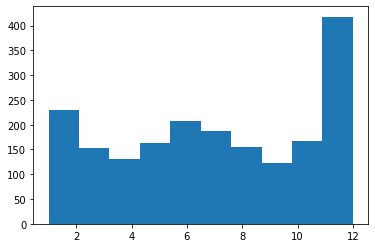

In [23]:
plt.hist(movies_df['DateMonth'])

In [ ]:
pd.to_datetime('2019-06-20').month